# Geometric Brownian Motion

The Geometric Brownian Motion <b>(GBM)</b> is a continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion (also called a Wiener process) with drift. This method is used to model stock prices in the Black–Scholes model and is the most widely used model of stock price behavior.

The Geometric Brownian Motion equation is represented as:

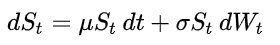

Where:
* <b>S(t)</b> is the price of a security/portfolio at time t
* <b>σ</b> is the volatility of the security’s price
* <b>µ</b> is mean return (per unit time).
* <b>dS(t)</b> infinitesimal increment in price
* <b>dW(t)</b> infinitesimal increment of a standard Brownian
Motion/Wiener Process


In [300]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as stats
import datetime

In [301]:
stock_data = yf.Ticker('^SPX')
data = stock_data.history(start='2023-01-01', end='2023-12-31', auto_adjust=False, actions=False)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06 00:00:00-05:00,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09 00:00:00-05:00,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000


In [302]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2698860000
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3126060000


# Calculating returns

In [303]:
data['Returns'] = data['Adj Close'].pct_change()
data.dropna(inplace=True)

# Distribution of returns

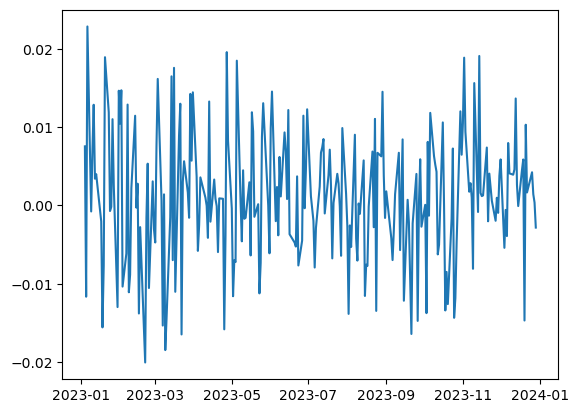

In [304]:
plt.plot(data['Returns'])

(array([ 5., 18., 16., 31., 65., 44., 34., 21., 10.,  5.]),
 array([-0.02004123, -0.01575303, -0.01146483, -0.00717663, -0.00288843,
         0.00139977,  0.00568797,  0.00997618,  0.01426438,  0.01855258,
         0.02284078]),
 <BarContainer object of 10 artists>)

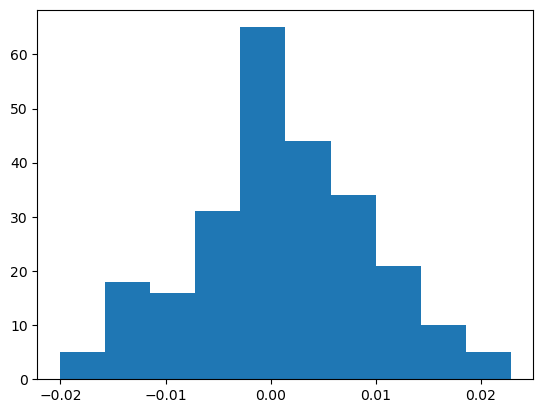

In [305]:
plt.hist(data['Returns'])

## Shapiro-Wilk Test

* <b>H0:</b> the sample comes from a normal distribution
* <b>H1:</b> the sample does not come from a normal distribution

In [306]:
shapiro_test = stats.shapiro(data['Returns'])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test Statistic: 0.9936331510543823
Shapiro-Wilk Test p-value: 0.3720514178276062


We don't reject the null hypothesis that the data is normally distributed

# GBM simulation

In [307]:
mu = data['Returns'].mean()
sigma = data['Returns'].std()
S0 = data['Adj Close'].iloc[-1]  # Initial price

In [308]:
S0

4769.830078125

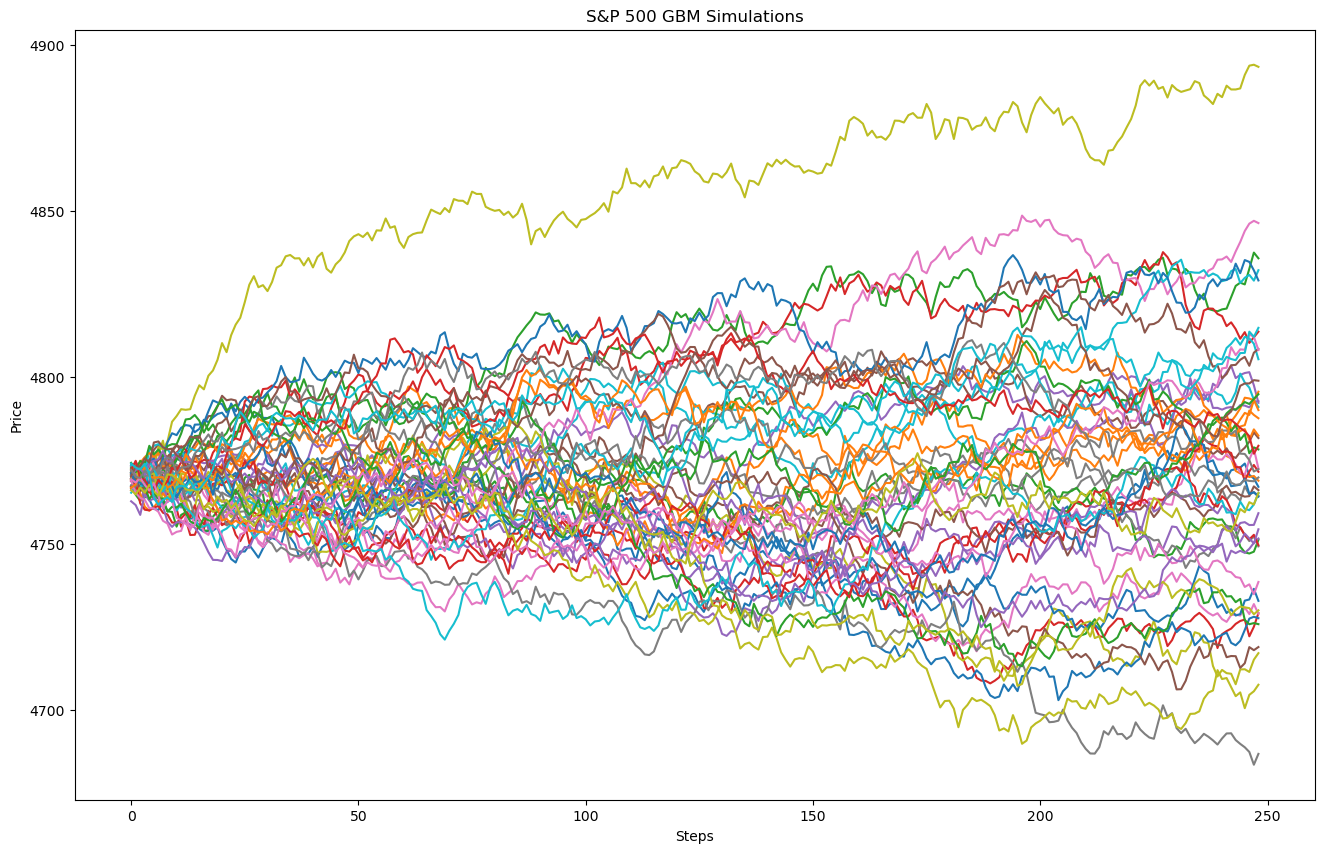

In [309]:
T = 252
N = len(data)

plt.figure(figsize=(16,10))

for i in range(50):
    dt = 1 / T
    t = np.linspace(0, 1, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # Geometric Brownian motion
    plt.plot(S, label=f'Simulation {i+1}')

plt.xlabel('Steps')
plt.ylabel('Price')
plt.title('S&P 500 GBM Simulations')
plt.show()